# **Jordan Tompkins**

# **WGU D213, Advanced Data Analytics**

# **Task 2**

# A1, Research Question: 

Can we predict an Amazon user's sentiment as posititive or negative by using previous reviews from other's?

# A2, Objectives or Goals:

One of the main goals of this data analysis is to attempt to predict how a user might feel about a certain product. This prediction will be based off the word choices of the user. Being able to predict how a user might feel about a certain product based on the wording that they use can be extremely helpful when it comes to understanding both the products and customers

# A3, Prescribed Network:

The type of neural network that will be trained to produe useful predictions on text sequences on this dataset in this analysis is a Recurrent Neural Netword (RNN). A RNN is an artificial neural network that uses sequential data or time series data and is commonly used for problems such as language translation, natural language processing, etc. They will take information from prior inputs to influence the current input and output, where the output depends on prior elements of the sequence. ("What is recurrent nerual networks", n.d)

# B1, Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
porter = PorterStemmer()
pd.set_option('display.max_colwidth', 5000)

In [2]:
colnames = ['review', 'score']
df = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', names=colnames, header=None, dtype={'locationid':np.int64})
df['Source'] = 'Amazon'


In [3]:
df

,review,score,Source
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
995,The screen does get smudged easily because it touches your ear and face.,0,Amazon
996,What a piece of junk.. I lose more calls on this phone.,0,Amazon
997,Item Does Not Match Picture.,0,Amazon
998,The only thing that disappoint me is the infra red port (irda).,0,Amazon


In [4]:
df['review'] = df['review'].str.lower()
df

,review,score,Source
0,so there is no way for me to plug it in here in the us unless i go by a converter.,0,Amazon
1,"good case, excellent value.",1,Amazon
2,great for the jawbone.,1,Amazon
3,tied to charger for conversations lasting more than 45 minutes.major problems!!,0,Amazon
4,the mic is great.,1,Amazon
...,...,...,...
995,the screen does get smudged easily because it touches your ear and face.,0,Amazon
996,what a piece of junk.. i lose more calls on this phone.,0,Amazon
997,item does not match picture.,0,Amazon
998,the only thing that disappoint me is the infra red port (irda).,0,Amazon


In [5]:
reviews = df['review']
list_of_characters = []
for review in reviews:
    for character in review:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)
len(list_of_characters)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']']


57

In [6]:
df.review.replace('[^A-Za-z ]+', '', regex=True, inplace = True)

In [7]:
reviews = df['review']
list_of_characters = []
for review in reviews:
    for character in review:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)
len(list_of_characters)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', 'z', 'q', 'k']


27

In [8]:
df

,review,score,Source
0,so there is no way for me to plug it in here in the us unless i go by a converter,0,Amazon
1,good case excellent value,1,Amazon
2,great for the jawbone,1,Amazon
3,tied to charger for conversations lasting more than minutesmajor problems,0,Amazon
4,the mic is great,1,Amazon
...,...,...,...
995,the screen does get smudged easily because it touches your ear and face,0,Amazon
996,what a piece of junk i lose more calls on this phone,0,Amazon
997,item does not match picture,0,Amazon
998,the only thing that disappoint me is the infra red port irda,0,Amazon


In [9]:
stop_words = stopwords.words('english')
df['review'] = df.review.apply(lambda review: " ".join(word for word in review.split() if word not in stop_words))

In [10]:
df

,review,score,Source
0,way plug us unless go converter,0,Amazon
1,good case excellent value,1,Amazon
2,great jawbone,1,Amazon
3,tied charger conversations lasting minutesmajor problems,0,Amazon
4,mic great,1,Amazon
...,...,...,...
995,screen get smudged easily touches ear face,0,Amazon
996,piece junk lose calls phone,0,Amazon
997,item match picture,0,Amazon
998,thing disappoint infra red port irda,0,Amazon


# B1a
The code provided above was utilized to help clean up the data set and make it easier for use in sentiment analysis. After loading the data set, the data was first converted to all lower case, rather than having both upper and lower case letters. It was then examined for any unusual characters (emojis, non-english characters, etc). There was 57 characters initially, however some of those were either emojis, puncutation, and numbers. For the sake of creating a model to predict how a customer might review might feel based on the words they chose to use, it was determined that it would be best to get rid of these unnecessary characters. After that, stopwords were removed from the dataset as well.

In [11]:
#Code below is splitting the data into training, testing and validation data sets
X = np.array(df['review'])
y = df.score.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 13, stratify = y)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, test_size = 0.5, random_state = 13, stratify = y_test)

# B1b
The provided below was utilized to determine the vocabulary size of the dataset by fitting it on the training dataset. The Tokenizer class from the Keras library was utilized to perform the task. It was determined that the vocabulary size was 1,535 unique words throughout the data set. The vocabulary size also plays a role in determining the maximum embedding sequence later on

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(df['review'])
print("Vocabulary size: ", vocab_size)

Vocabulary size:  1535


# B1c
The code provided below was utilized for determining the word embedding length. It is the position of the word in the learned vector space and can be determined by taking the fourth root of the vocabulary size determined beforehand. 

In [13]:
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
max_sequence_embedding

6

# B1d

The following code provided was used to determine the maximum sequence length of the data set. In finding the maximum sequence length, we are preserving the available input data so that the model won't yield any conconclusions that don't work well. It also helps with the padding sequence, as the shorter inputs will be padded to fit this size.

In [14]:
review_length = []
for review in df['review']:
    review_length.append(len(review.split(' ')))
    
review_max = np.max(review_length)
print(review_max)

16


# B2, Tokenization:

After converting the dataset to lowercase, removing stopwords and non-english and unusual characters, getting the maximum review length and the embedding sequence, the next step was to tokenize the data. The reason being is that "the primary goal of tokenization is to represent text in a manner that's meaningful for machines without losing its context" (Awan, 2023). Tokenization allows for the machines being used to understand and respond to human input. The process takes and text and separates it into smaller chunks. 

In [15]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(word_index)

{'OOV': 1, 'phone': 2, 'great': 3, 'good': 4, 'product': 5, 'quality': 6, 'one': 7, 'works': 8, 'headset': 9, 'use': 10, 'well': 11, 'work': 12, 'sound': 13, 'battery': 14, 'ear': 15, 'would': 16, 'time': 17, 'dont': 18, 'really': 19, 'case': 20, 'like': 21, 'im': 22, 'price': 23, 'recommend': 24, 'ive': 25, 'best': 26, 'also': 27, 'excellent': 28, 'service': 29, 'nice': 30, 'get': 31, 'love': 32, 'ever': 33, 'used': 34, 'car': 35, 'charger': 36, 'new': 37, 'happy': 38, 'bluetooth': 39, 'comfortable': 40, 'item': 41, 'doesnt': 42, 'worked': 43, 'could': 44, 'poor': 45, 'even': 46, 'money': 47, 'cell': 48, 'easy': 49, 'first': 50, 'bad': 51, 'got': 52, 'better': 53, 'waste': 54, 'worst': 55, 'device': 56, 'enough': 57, 'fit': 58, 'hear': 59, 'made': 60, 'using': 61, 'long': 62, 'fine': 63, 'two': 64, 'still': 65, 'life': 66, 'camera': 67, 'make': 68, 'right': 69, 'bought': 70, 'reception': 71, 'makes': 72, 'design': 73, 'buy': 74, 'charge': 75, 'clear': 76, 'working': 77, 'much': 78, 'p

# B3, Padding process

The code below was utilized for the padding process of the analysis. This is done to preserve the shape of the tensor dimensions and ensure that the sentences and inputs were the same length. As determiend above, the maximum review length was 16, thus by completing the padding process, all inputs had to be padded to be of that size, whether or not there were actually 16 words within the specicific review. The data was previously split into the training, testing and validation sets and were subsequently tokenized-by-index. After that, pst padding was used, which means that the padding occurs after the text sequence. See below for the code related to the padding process as well as an example of what a padded sequence looks like within the training, testing and validation sets. 

In [16]:
sequence_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequence_train, maxlen = review_max, padding='post', truncating = 'post')

In [17]:
sequence_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequence_test, maxlen=review_max, padding='post', truncating='post')

In [18]:
sequence_val = tokenizer.texts_to_sequences(X_val)
padded_val = pad_sequences(sequence_val, maxlen=review_max, padding='post', truncating='post')

In [19]:
padded_train[0]

array([146,   9,   4,  17,  38,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

In [20]:
padded_test[0]

array([   2, 1463,  119,    1,  855,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [21]:
padded_val[0]

array([487,   1,   1,  16, 342,  74,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

# B4, Categories of Sentiment

Within the data, there are only two categories of sentiment that exist, positive or negative, labeled in the dataset as a 1 for positive and a 0 for negative. The activiation function for the final dense layer of the network will be a sigmoid function. 

# B5, Steps to prepare the data

1. Import the necessary packages for the sentiment analysis
2. Load/read in the "amazon_cells_labeled" text file
3. Lower case the text, remove unusual characters, non-english characters, etc. 
4. Remove stopwords from the data set. 
5. Split the data into the training, testing and validation sets. It was determined, based on industry average, to split the data 80/10/10. 80% of the data went to the training dataset, 10% to both the testing and validation dataset. (Train test validation split: How to & best practices [2023], n.d)
6. Determine the vocabulary size of the data set
7. Determine the word embedding length of the data set
8. Determine the maximum review length
9. Tokenize the data
10. Pad the sequences 
11. Determine the number of categories of sentiment and the activation function that will be used for the final dense layer of the network

# B6, prepared data set

See below for code of the prepared data set. CSV file uploaded separately

In [22]:
df.to_csv('JTompkins_task2_clean.csv')

# C1, Model Summary

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, max_sequence_embedding, input_length = review_max))
model.add(Flatten())
model.add(Dense(64, activation =  "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 6)             9210      
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 64)                6208      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17531 (68.48 KB)
Trainable params: 17531 (68.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# C2, Network Architecture

The model created had 5 layers and was a sequential model. The first layer is an Embedding layer used to reduce the dimensions. It has 9,210 parameters. This parameter is determined by taking the vocabulary size of 1,535 and multiplying it by the embedding length of 6. The next layers is a Flatten layer that was used to flatten the inputs into one single dimension from multiple dimensions. This layer had zero parameters. The third layer was a Dense layer which consisted of 64 nodes using the ReLu activation function. The total parameters for this is 6,208. The next layer was another Dense layer, this time with 32 nodes and 2,080 parameters. Finally, the last layer was a final Dense layer that only had one node. This one used the sigmoid activiation function and had 33 parameters. 

# C3, Hyperparameter Justifications

The activiation funcitons that were used throughout the Dense layers of the models were the ReLu (Rectified Linear Unit) and the sigmoid activiation functions. ReLu was used for the first 2 Dense layers as this function is typically used for most analysis. The sigmoid function was used due to the result being a binary result of 0 or 1. 

The number of nodes for the embedding layer was 6 which is the size of the layer's output. The Dense layers have 64, 32 and 1 node respectively. These are "hidden" and help bring the original input of the review down to the single output of 1 or 0. 

A binary cross entropy loss function was used for the model as well. The reason being is that the model is related to a classification problem. The results are restricted to 1 or 0 thus calling for a binary cross entropy loss function to be used. 

"Adam" was used for the optimizer due to it being a high performing and efficient optimizer, as well as the optimizer that is typically used for this type of analysis. 

Down below is the code for the stopping criteria of the analysis. EarlyStopping was called, which monitors the validation accuracy score and stops it in the event that the validation accuracy doesn't increase after the determined 2 epochs (indicated py the patience). 

The accuracy was the evaluation metric. We are looking at increasing the models accuracy with the model being fitted to training data. As the model is trying to become more accurate, we have the stopping criteria looking at validation accuracy to avoid any issues with performance on the validation set. 

In [24]:
early_stopping_monitor = EarlyStopping(patience = 2)
history = model.fit(padded_train, y_train, validation_data = (padded_val, y_val), epochs = 15, callbacks=early_stopping_monitor)

Epoch 1/15
25/25 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5400
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6050 - val_loss: 0.6886 - val_accuracy: 0.5500
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.7638 - val_loss: 0.6704 - val_accuracy: 0.6500
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.9025 - val_loss: 0.6148 - val_accuracy: 0.6500
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.9438 - val_loss: 0.5258 - val_accuracy: 0.7200
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9688 - val_loss: 0.4968 - val_accuracy: 0.7300
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9812 - val_loss: 0.5760 - val_accuracy: 0.7900
Epoch 8/15
25/25 [=

# D1, Stopping Criteria

As stated above, the stopping criteria was monitoring the validation accuracy score, and would stop after the score does not increase for 2 epochs. Above is the training model that shows the model quit training after 8 epochs. The early stopper came into play because after epoch 6 (so for epoch 7 & 8), the val_accuracy was not improving for 2 consecutive epochs. If it had been improving, the model would have kept training and done so until the accurayc either stopped improving after 2 epochs, or reached a maximum of 15 epochs. You can see that the final epoch, epoch 8 has the highest accuracy of all of them. 

In [25]:
model.evaluate(padded_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7300


[0.6646946668624878, 0.7300000190734863]

# D2, Fittness

The code provided above is looking at the fittness of the model and the accuracy scores for it. The accuracy score is 0.80 which indicates that the model fits the test data very well. It has a loss score of 0.47, however, and this could indicate potential overfitting. To avoid overfitting, the EarlyStopping() function was used to make sure that the model prioritized validation accuracy rather than continuing to train on itself and thus rasining the training accuracy. We wanted to make sure that the model didn't learn the training dataset too well which is why the early stopper was created. 

# D3, Training Process

Below are two line graphs showing the accuracy of the Training model across the epochs as well as the loss of the training model across the epochs. One can see that the training accuracy increases across both models. As the epochs increase, the training set continues to increase in accuracy, which can be indicative of overfitting since the validation accuracy begins to not increase before the early stopper created is called to end the model.  

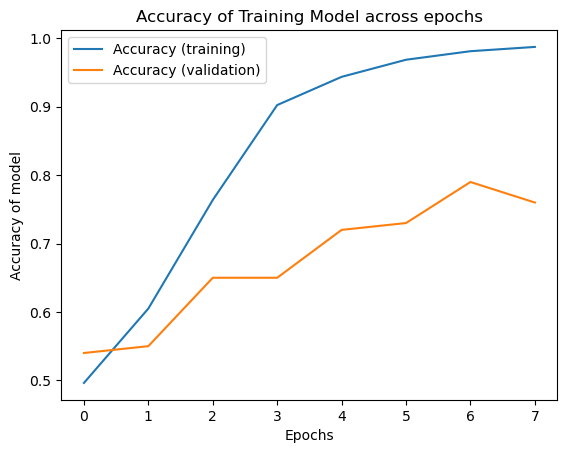

In [26]:
plt.plot(history.history['accuracy'], label = "Accuracy (training)")
plt.plot(history.history['val_accuracy'], label = "Accuracy (validation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy of model")
plt.legend()
plt.title("Accuracy of Training Model across epochs")
plt.show()

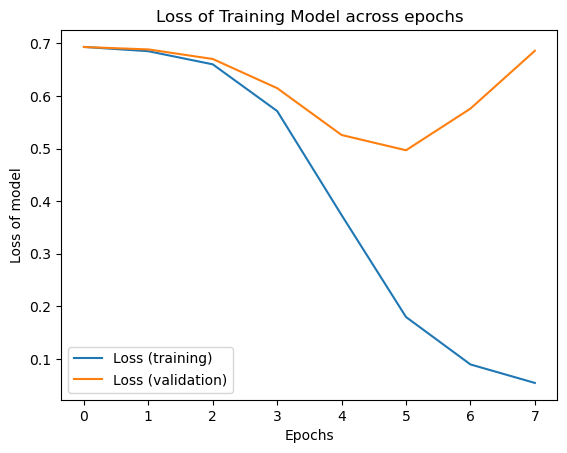

In [27]:
plt.plot(history.history['loss'], label = "Loss (training)")
plt.plot(history.history['val_loss'], label = "Loss (validation)")
plt.xlabel("Epochs")
plt.ylabel("Loss of model")
plt.legend()
plt.title("Loss of Training Model across epochs")
plt.show()

In [28]:
y_pred = model.predict(padded_test)

4/4 [==============================] - 0s 2ms/step


In [29]:
model_score = model.evaluate(padded_test, y_test)
print('Test Loss: ', model_score[0])
print('Test accuracy: ', model_score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7300
Test Loss:  0.6646946668624878
Test accuracy:  0.7300000190734863


# D4, Predictive Accuracy

The code provided above, which was also provided in section D2, shows the models accuracy. The model has an accuracy of 80%, indicating that the model fits the data well and does a does a good job with predictions. 

# E, Code

The provided below was used to save the model within the neural network

In [30]:
model.save('JTompkins_Task2Model.h5')


C:\Users\jorda\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# F, Functionality

The neural network that was created is moderately effective at the performance of sentiment analysis. There was an 80% accuracy score on the test set, with a little higher loss value at around 47%. It would be better if it was a slightly lower, however, it isn't too bad. There is always room for improvement, however, this is a good model to begin with. 

The network architecture is a basic, yet effective and efficient architecture. It relied heavily on the Dense layers, but was able to complete a model that had a relatively good accuracy score as well as a model that was time efficient and can perform rather quickly. 

# G, Recommendations:

The neural network that was created can effectively predict the sentiment of the reviews from the Amazon text file provided to us. While the model isn't 100% accurate, it does have a fairly high accuracy. An organization could confidently use this neural network as either an main neural network, or they can even use it as an initial model and continue to improve it as time goes on they have more data that can help with the training of it. 

# H, Reporting

This analysis was created using Jupyter Notebook and has been uploaded along side a PDF copy of the executed code 

# I, Sources for third-party code

There was no third-party code used for this analysis

# J, Sources:

Awan, A. A. (2023, September 22). What is tokenization? types, use cases, implementation. DataCamp. https://www.datacamp.com/blog/what-is-tokenization 

Train test validation split: How to &amp; best practices [2023]. V7. (n.d.). https://www.v7labs.com/blog/train-validation-test-set#:~:text=In%20general%2C%20putting%2080%25%20of,good%20split%20to%20start%20with. 

What are recurrent neural networks?. IBM. (n.d.). https://www.ibm.com/topics/recurrent-neural-networks 